In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
iris = pd.read_csv("iris.csv")
iris

,sepal.length sepal width,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,versicolor
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,virginica
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.3,versicolor
6,4.6,3.4,1.4,0.4,virginica


<Axes: xlabel='variety', ylabel='count'>

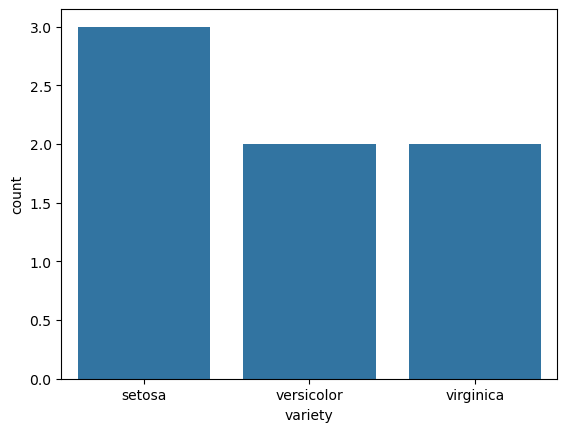

In [3]:
import seaborn as sns
counts = iris["variety"].value_counts()
sns.barplot(data = counts)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sepal.length  sepal width  7 non-null      float64
 1   sepal.width                7 non-null      float64
 2   petal.length               7 non-null      float64
 3   petal.width                7 non-null      float64
 4   variety                    7 non-null      object 
dtypes: float64(4), object(1)
memory usage: 412.0+ bytes


In [5]:
iris[iris.duplicated(keep=False)]

,sepal.length sepal width,sepal.width,petal.length,petal.width,variety


#### Observations
- There are 150 rows and 5 columns
- There are no null values
- There is one duplicated row
- The X-columns are sepal.length,sepal.width,petal.length and petal.width
- All the X-columns are continuous
- The Y - columns is "variety" which is categorical
- There are three flower categories

In [7]:
iris = iris.drop_duplicates(keep='first')
iris[iris.duplicated]


,sepal.length sepal width,sepal.width,petal.length,petal.width,variety


In [8]:
iris = iris.reset_index(drop=True)
iris

,sepal.length sepal width,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,versicolor
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,virginica
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.3,versicolor
6,4.6,3.4,1.4,0.4,virginica


In [21]:
labelencoder = LabelEncoder()
iris.iloc[:, -1] = labelencoder.fit_transform(iris.iloc[:,-1])
iris.head()

,sepal.length sepal width,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,0


In [23]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sepal.length  sepal width  7 non-null      float64
 1   sepal.width                7 non-null      float64
 2   petal.length               7 non-null      float64
 3   petal.width                7 non-null      float64
 4   variety                    7 non-null      object 
dtypes: float64(4), object(1)
memory usage: 412.0+ bytes


observation
- The target column(variety) is still object type. it needs to be converted to numeric(int)

In [25]:
iris['variety'] = pd.to_numeric(labelencoder.fit_transform(iris['variety']))
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sepal.length  sepal width  7 non-null      float64
 1   sepal.width                7 non-null      float64
 2   petal.length               7 non-null      float64
 3   petal.width                7 non-null      float64
 4   variety                    7 non-null      int32  
dtypes: float64(4), int32(1)
memory usage: 384.0 bytes
None


In [27]:
X=iris.iloc[:,0:4]
Y=iris['variety']

In [29]:
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3,random_state = 1)
x_train

,sepal.length sepal width,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
4,5.0,3.6,1.4,0.2
3,4.6,3.1,1.5,0.2
5,5.4,3.9,1.7,0.3


In [31]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth =None)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

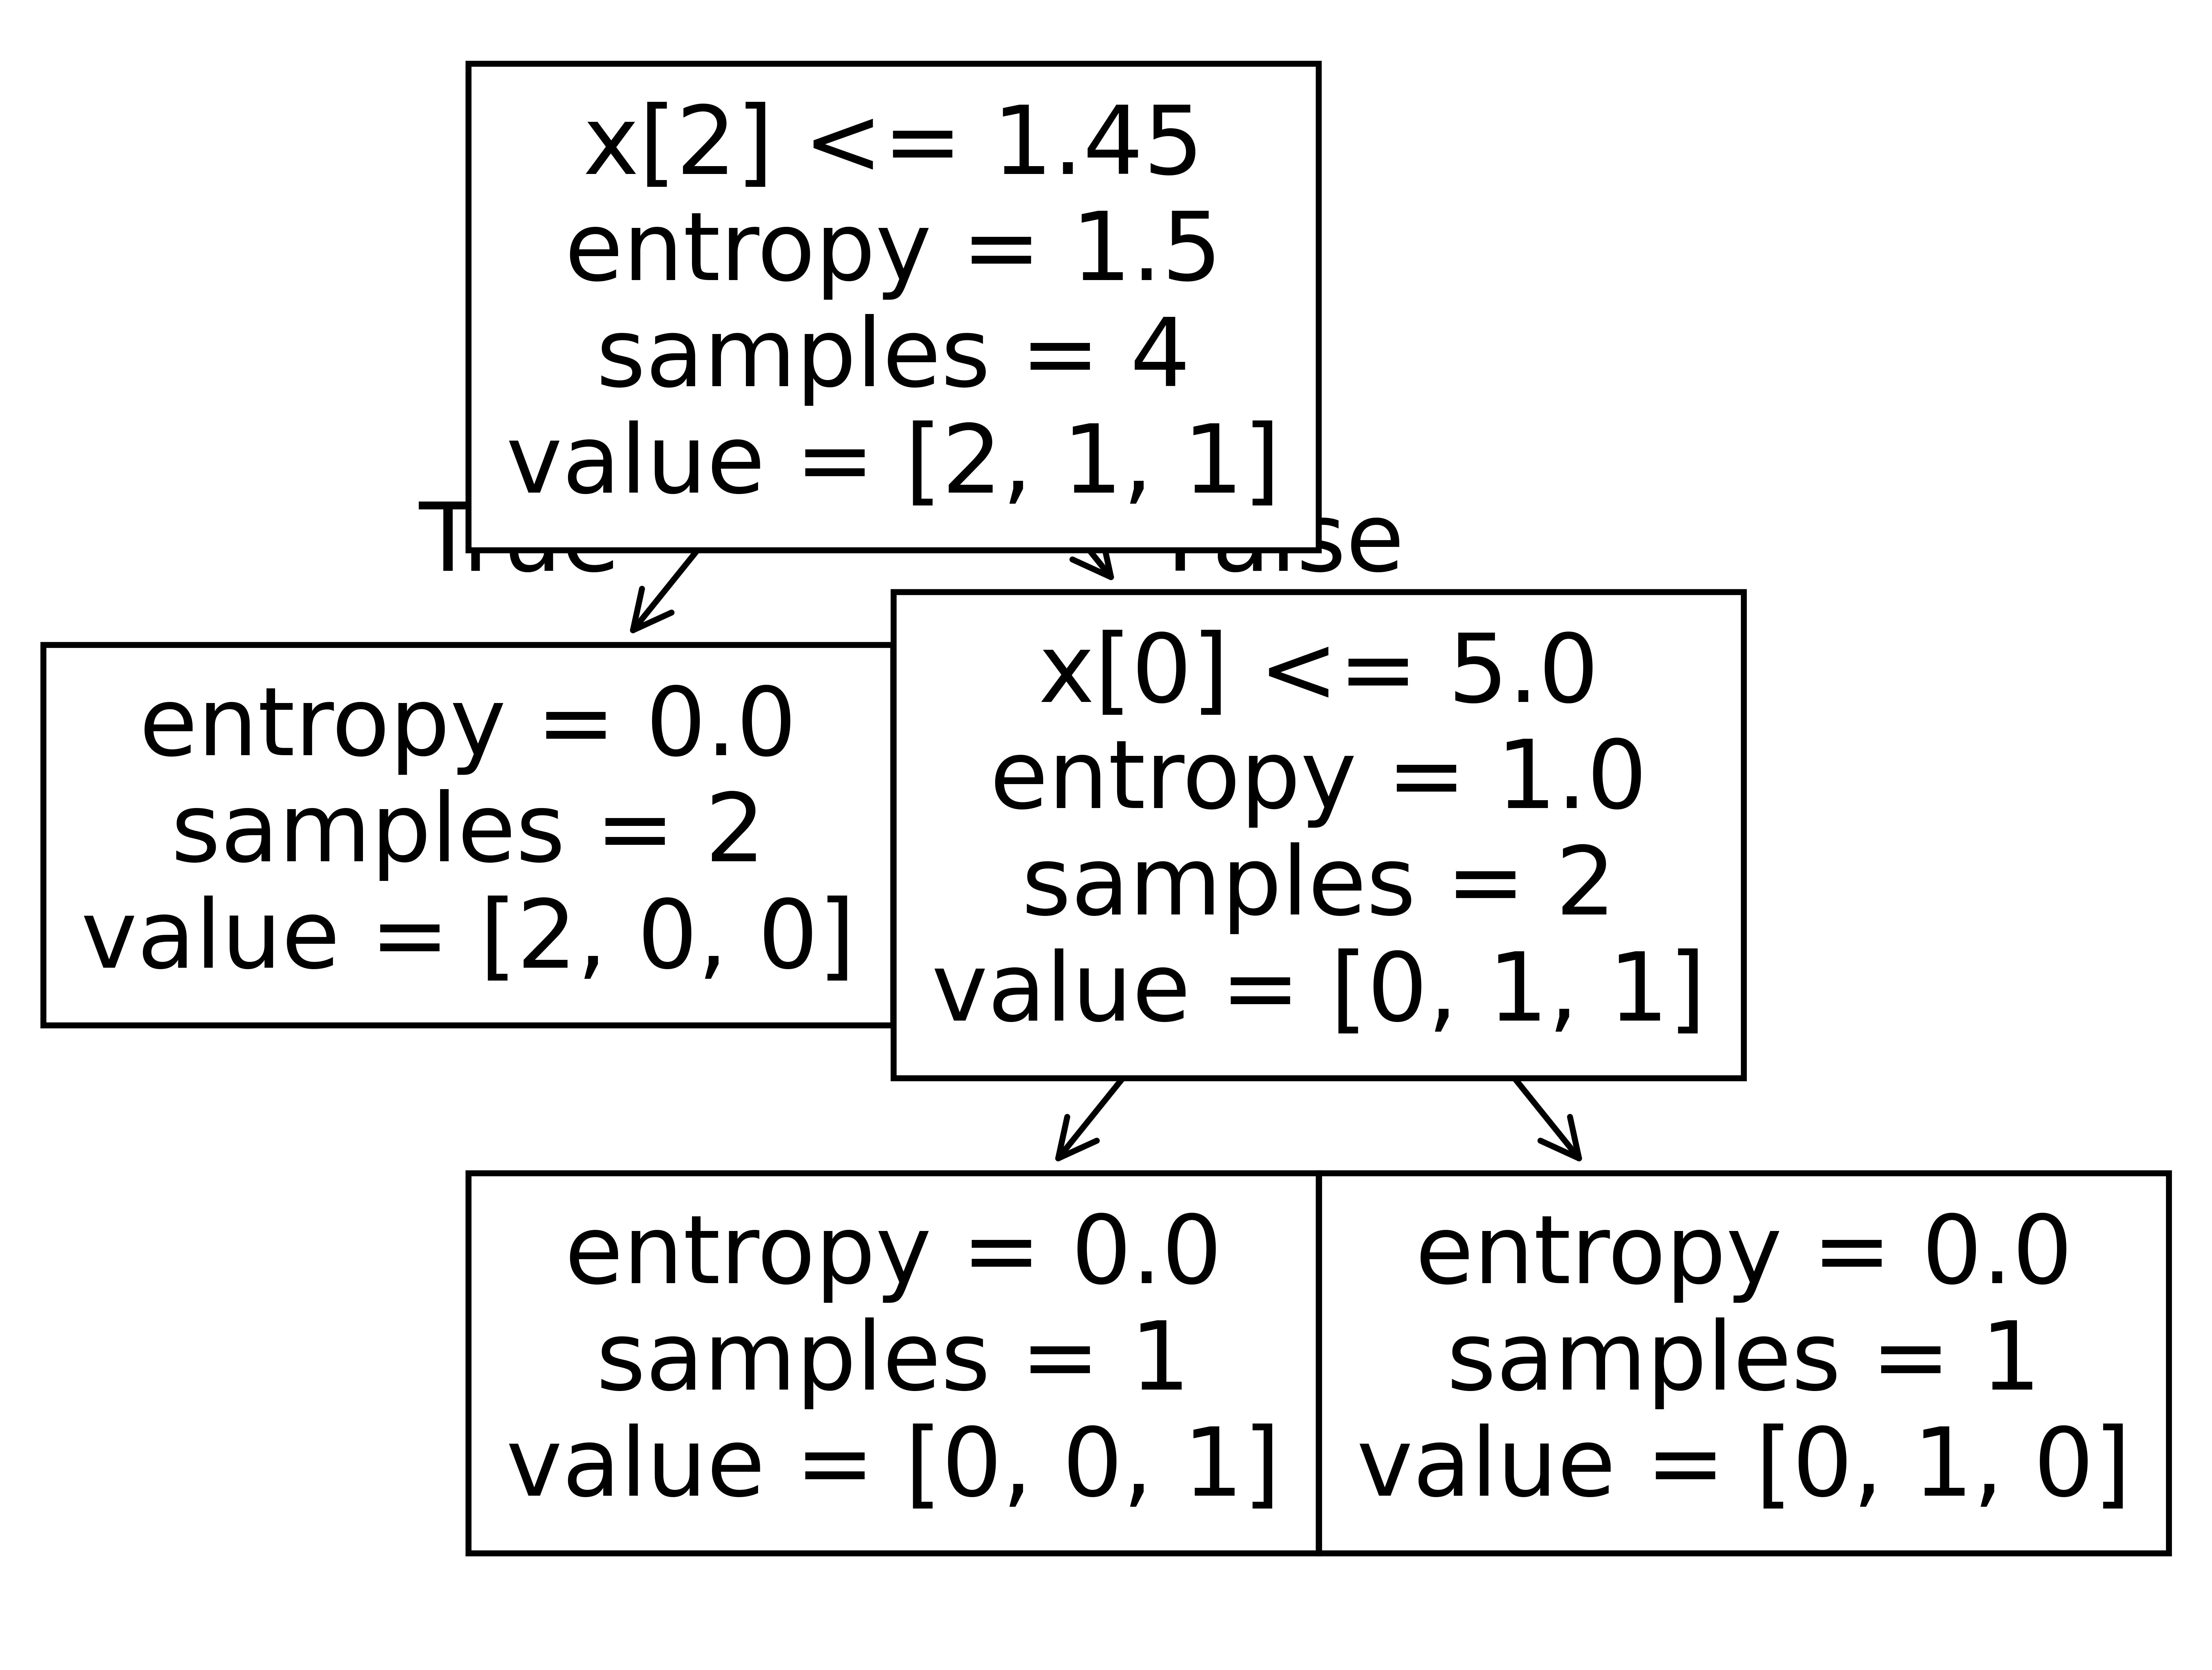

In [33]:
plt.figure(dpi=1200)
tree.plot_tree(model);

In [35]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
plt.figure(dpi=1200)
tree.plot_tree(model,feature_names = fn, class_names=cs,filled = True);

NameError: name 'cs' is not defined

<Figure size 7680x5760 with 0 Axes>

In [ ]:
-=